In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
df = pd.read_csv('Data/BeerWineLiquor.csv')

In [3]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    324 non-null    object
 1   beer    324 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [5]:
df.columns = ['ds','y']

In [6]:
df.head()

,ds,y
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [7]:
df['ds'] = pd.to_datetime(df['ds'])

In [8]:
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      324 non-null    datetime64[ns]
 1   y       324 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB


In [10]:
m = Prophet()

m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [11]:
future = m.make_future_dataframe(periods=24, freq='MS')

In [12]:
future

,ds
0,1992-01-01
1,1992-02-01
2,1992-03-01
3,1992-04-01
4,1992-05-01
...,...
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01


In [15]:
df.tail()

,ds,y
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130
323,2018-12-01,6370


In [16]:
future.tail()

,ds
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01


In [17]:
print(len(df))
print(len(future))

324
348


In [18]:
forecast = m.predict(future)

In [20]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1778.389678,1162.489880,1477.941694,1778.389678,1778.389678,-461.901459,-461.901459,-461.901459,-461.901459,-461.901459,-461.901459,0.0,0.0,0.0,1316.488218
1,1992-02-01,1780.987184,1190.076650,1515.528138,1780.987184,1780.987184,-427.924955,-427.924955,-427.924955,-427.924955,-427.924955,-427.924955,0.0,0.0,0.0,1353.062229
2,1992-03-01,1783.417109,1437.570650,1768.918182,1783.417109,1783.417109,-179.677739,-179.677739,-179.677739,-179.677739,-179.677739,-179.677739,0.0,0.0,0.0,1603.739371
3,1992-04-01,1786.014616,1420.623061,1746.514284,1786.014616,1786.014616,-196.091481,-196.091481,-196.091481,-196.091481,-196.091481,-196.091481,0.0,0.0,0.0,1589.923135
4,1992-05-01,1788.528331,1683.898940,2005.729855,1788.528331,1788.528331,45.713009,45.713009,45.713009,45.713009,45.713009,45.713009,0.0,0.0,0.0,1834.241340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2020-08-01,5204.920380,5084.057969,5410.213286,5192.805710,5217.161608,40.765082,40.765082,40.765082,40.765082,40.765082,40.765082,0.0,0.0,0.0,5245.685462
344,2020-09-01,5221.075787,4928.327820,5254.378883,5207.949767,5234.472907,-132.510619,-132.510619,-132.510619,-132.510619,-132.510619,-132.510619,0.0,0.0,0.0,5088.565168
345,2020-10-01,5236.710051,5031.756676,5349.758431,5222.760534,5250.974553,-43.280888,-43.280888,-43.280888,-43.280888,-43.280888,-43.280888,0.0,0.0,0.0,5193.429163
346,2020-11-01,5252.865458,5193.204708,5505.269976,5237.580236,5268.257137,87.236362,87.236362,87.236362,87.236362,87.236362,87.236362,0.0,0.0,0.0,5340.101820


In [23]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [24]:
forecast[['ds','yhat_lower', 'yhat_upper','yhat']].tail(12)

,ds,yhat_lower,yhat_upper,yhat
336,2020-01-01,4476.520302,4784.982116,4632.015644
337,2020-02-01,4514.459845,4838.813515,4682.147555
338,2020-03-01,4789.785892,5098.339918,4945.507893
339,2020-04-01,4780.225878,5107.184054,4945.249558
340,2020-05-01,5042.596291,5358.611803,5202.688312
341,2020-06-01,5041.145483,5343.992580,5183.565324
342,2020-07-01,5149.825503,5478.871858,5316.228164
343,2020-08-01,5084.057969,5410.213286,5245.685462
344,2020-09-01,4928.327820,5254.378883,5088.565168
345,2020-10-01,5031.756676,5349.758431,5193.429163


(array(16071.), array(18628.))

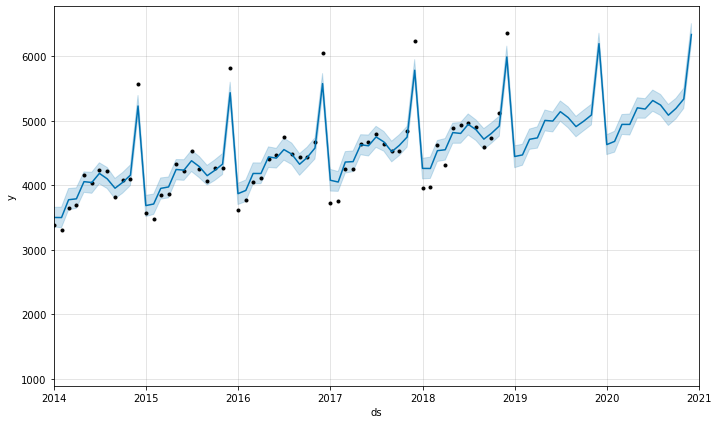

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

m.plot(forecast)
plt.xlim('2014-01-01', '2021-01-01')

<AxesSubplot:xlabel='ds'>

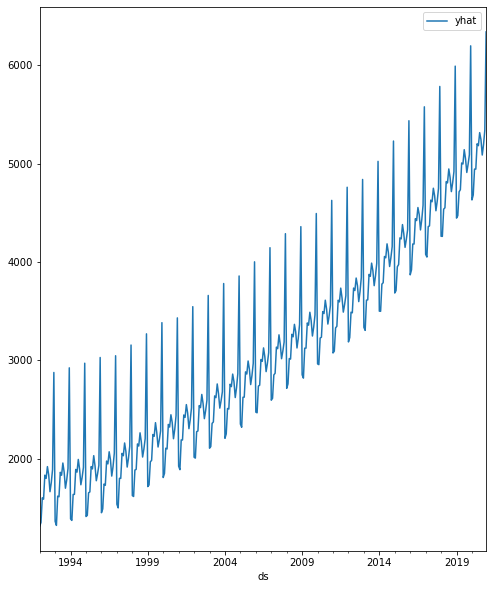

In [30]:
forecast.plot(x='ds',y='yhat', figsize=(8, 10))

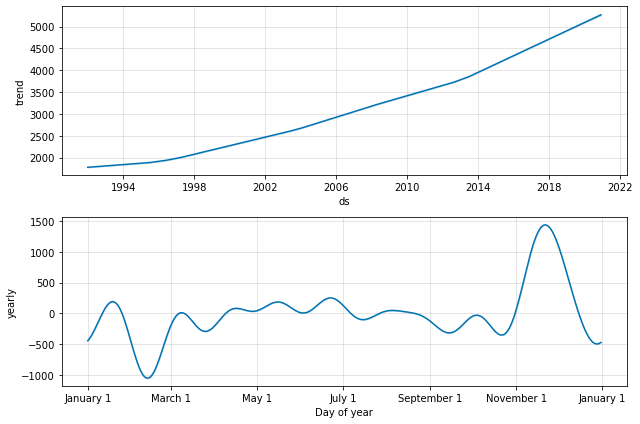

In [31]:
m.plot_components(forecast);

# Prophet Evaluation

In [32]:
df = pd.read_csv('Data/Miles_Traveled.csv')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              588 non-null    object 
 1   TRFVOLUSM227NFWA  588 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [34]:
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])

In [35]:
df.head()

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


<AxesSubplot:xlabel='ds'>

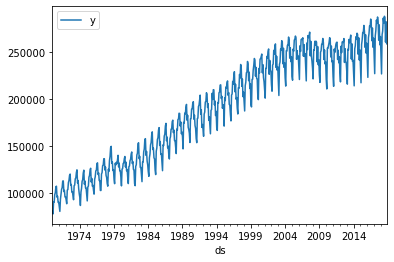

In [36]:
df.plot(x='ds',y='y')

In [37]:
len(df)

588

In [38]:
train = df.iloc[:576]
test = df.iloc[576:]

In [39]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [40]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
583,2018-08-01,263219.378669,274005.563021,285854.055723,263165.973306,263286.645515,16451.125033,16451.125033,16451.125033,16451.125033,16451.125033,16451.125033,0.0,0.0,0.0,279670.503702
584,2018-09-01,263357.665883,255845.729306,267358.811392,263268.467813,263466.096392,-1666.545411,-1666.545411,-1666.545411,-1666.545411,-1666.545411,-1666.545411,0.0,0.0,0.0,261691.120472
585,2018-10-01,263491.492218,262880.627108,274558.498098,263368.767781,263640.637785,5310.587893,5310.587893,5310.587893,5310.587893,5310.587893,5310.587893,0.0,0.0,0.0,268802.080112
586,2018-11-01,263629.779432,249738.034670,261701.249744,263456.755896,263809.346746,-8203.436940,-8203.436940,-8203.436940,-8203.436940,-8203.436940,-8203.436940,0.0,0.0,0.0,255426.342492
587,2018-12-01,263763.605767,251277.958828,262955.321543,263569.324677,264002.170664,-6916.514689,-6916.514689,-6916.514689,-6916.514689,-6916.514689,-6916.514689,0.0,0.0,0.0,256847.091078


<AxesSubplot:xlabel='ds'>

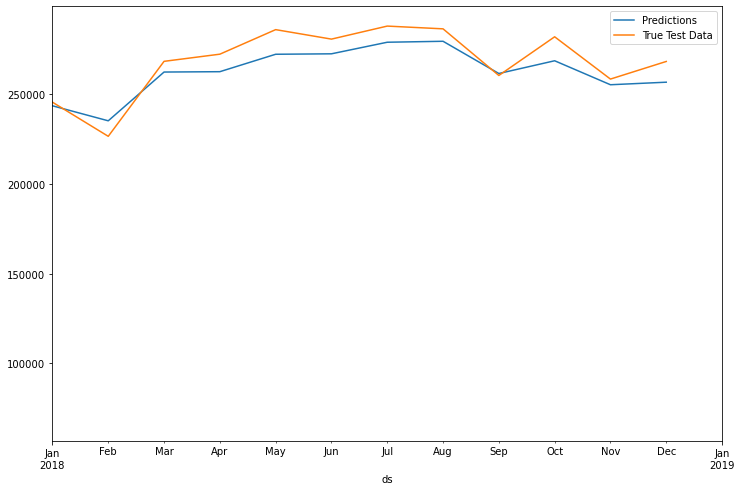

In [44]:
ax = forecast.plot(x='ds',y='yhat', label='Predictions',legend=True, figsize=(12,8))
test.plot(x='ds',y='y',label='True Test Data', legend=True, ax=ax,
         xlim=('2018-01-01','2019-01-01'))

In [45]:
from statsmodels.tools.eval_measures import rmse

In [46]:
predictions = forecast.iloc[-12:]['yhat']
predictions

576    243683.663737
577    235311.776917
578    262511.200772
579    262708.863987
580    272429.495856
581    272679.913346
582    279136.474721
583    279670.503702
584    261691.120472
585    268802.080112
586    255426.342492
587    256847.091078
Name: yhat, dtype: float64

In [48]:
test['y']

576    245695.0
577    226660.0
578    268480.0
579    272475.0
580    286164.0
581    280877.0
582    288145.0
583    286608.0
584    260595.0
585    282174.0
586    258590.0
587    268413.0
Name: y, dtype: float64

In [49]:
rmse(predictions, test['y'])

8750.25052083061

In [50]:
test.mean()

C:\Users\ilvna\.conda\envs\tf-2.3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



y    268739.666667
dtype: float64

In [51]:
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [52]:
# INITIAL
initial = 5 * 365
initial = str(initial) + ' days'
# PERIOD
period = 5 * 365
period = str(period) + ' days'
# HORIZION
horizon = 365
horizon = str(horizon) + ' days'

In [54]:
df_cv = cross_validation(m,initial=initial, period=period, horizon = horizon)

INFO:fbprophet:Making 9 forecasts with cutoffs between 1976-12-11 00:00:00 and 2016-12-01 00:00:00


In [55]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1977-01-01,108479.087389,106886.766224,109878.212671,102445.0,1976-12-11
1,1977-02-01,102996.111525,101535.125858,104359.275043,102416.0,1976-12-11
2,1977-03-01,118973.318113,117492.329065,120504.309675,119960.0,1976-12-11
3,1977-04-01,120612.923709,119128.403891,122021.648614,121513.0,1976-12-11
4,1977-05-01,127883.031830,126331.087726,129351.363487,128884.0,1976-12-11


In [56]:
len(df_cv)

108

In [57]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,52 days,2.437359e+07,4936.961190,4528.637861,0.027750,0.023384,0.4
1,53 days,2.187095e+07,4676.638408,4262.628303,0.024999,0.023384,0.4
2,54 days,1.842045e+07,4291.904691,3732.310696,0.020061,0.022021,0.5
3,55 days,2.351247e+07,4848.965429,4271.125183,0.023241,0.023384,0.4
4,57 days,2.115130e+07,4599.053997,3989.900860,0.021416,0.022021,0.5
...,...,...,...,...,...,...,...
94,360 days,1.862165e+07,4315.281433,3775.153749,0.019707,0.019425,0.5
95,361 days,1.777184e+07,4215.666214,3507.111932,0.018367,0.018879,0.5
96,362 days,3.210247e+07,5665.904399,4435.117794,0.022175,0.024755,0.4
97,364 days,3.022906e+07,5498.095592,4257.907114,0.021507,0.021415,0.5


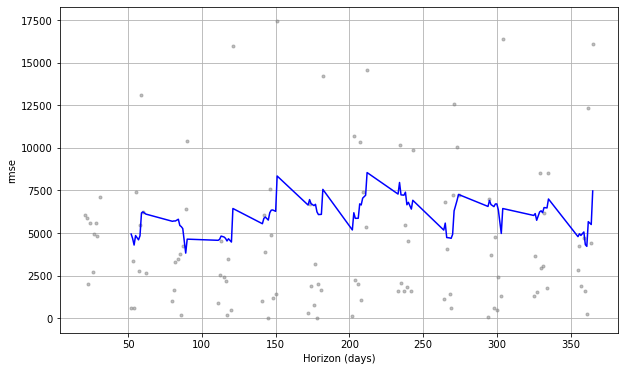

In [59]:
plot_cross_validation_metric(df_cv, metric='rmse');

# Facebook prophet Trend

In [1]:
import pandas as pd
from fbprophet import Prophet
%matplotlib inline

In [2]:
df = pd.read_csv('Data/HospitalityEmployees.csv')

In [4]:
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])

<AxesSubplot:xlabel='ds'>

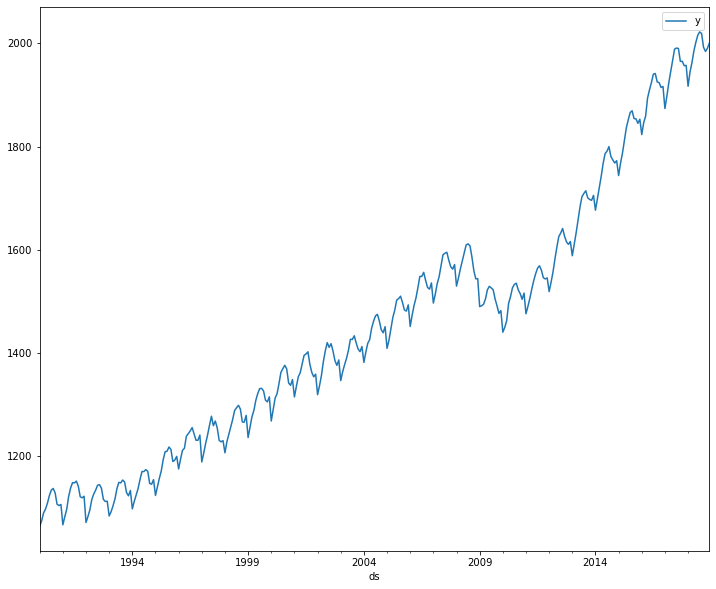

In [5]:
df.plot(x='ds', y='y', figsize=(12,10))

In [6]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

C:\Users\ilvna\.conda\envs\tf-2.3\lib\importlib\_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject

C:\Users\ilvna\.conda\envs\tf-2.3\lib\importlib\_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject

C:\Users\ilvna\.conda\envs\tf-2.3\lib\importlib\_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


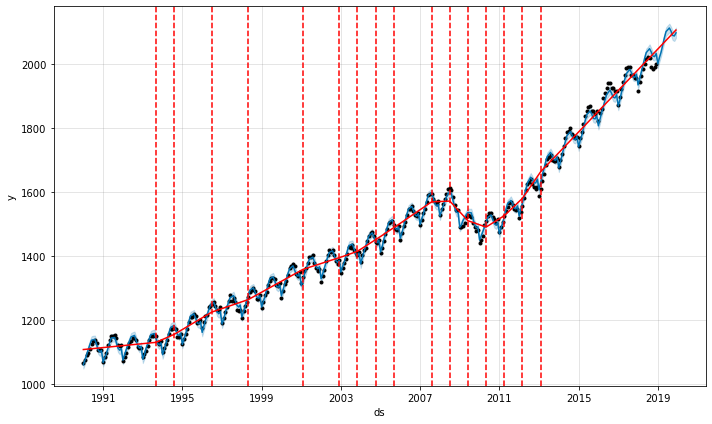

In [7]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),m, forecast)

# Facebook Prophet Seasonality

In [8]:
df = pd.read_csv('Data/airline_passengers.csv')

In [11]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [12]:
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


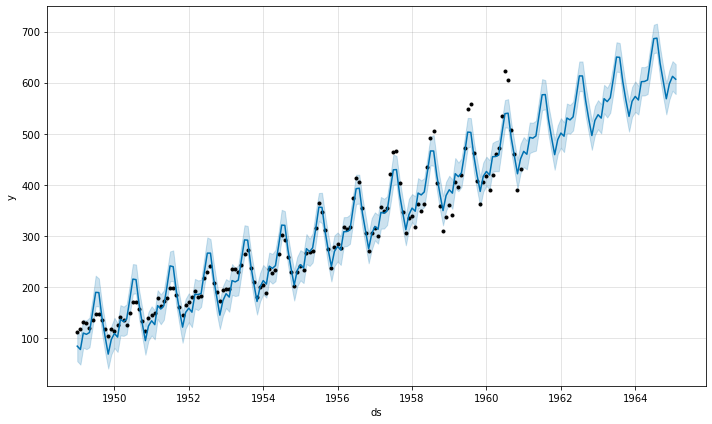

In [13]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(50, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

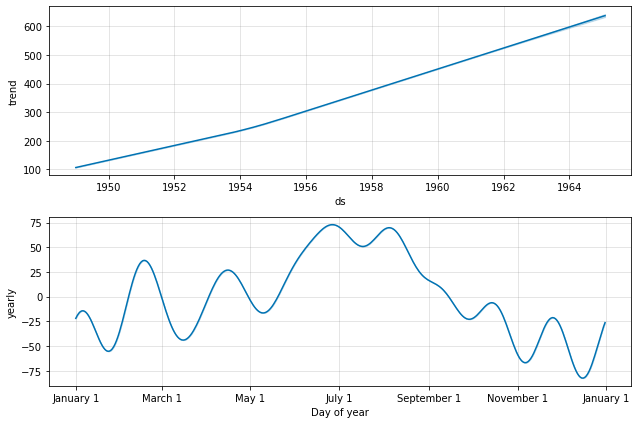

In [15]:
fig = m.plot_components(forecast);

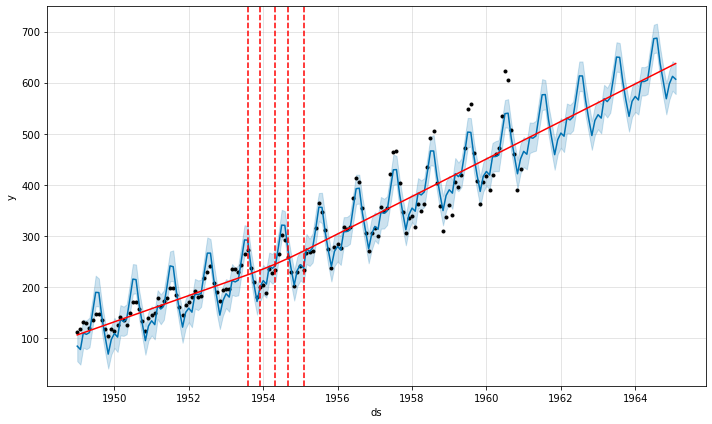

In [16]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),m, forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


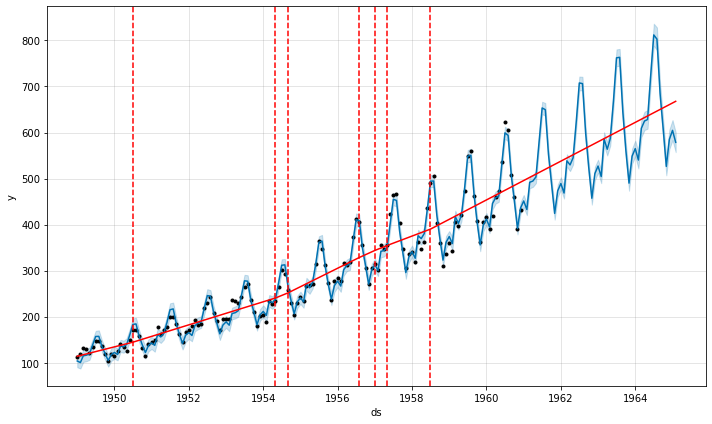

In [18]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
future = m.make_future_dataframe(50, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)
b = add_changepoints_to_plot(fig.gca(), m, forecast)